**Processamento Digital de Imagens**

Projeto de deteção de células


In [1]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random

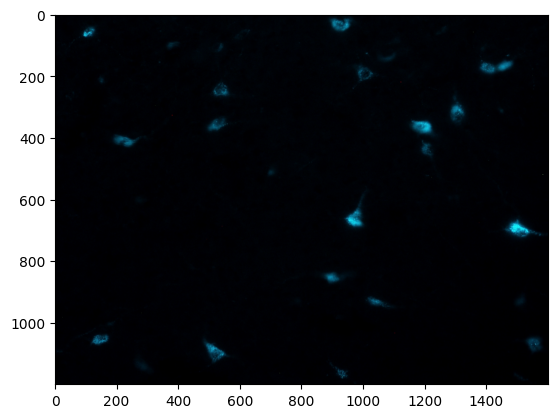

In [3]:
path = "C:/Users/Luis/Desktop/UFU/PDI/pgc111-labs-2023-02/project/fluocells/all_images/images/Mar19bS1C4R2_LHr_200x_y.png"
img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

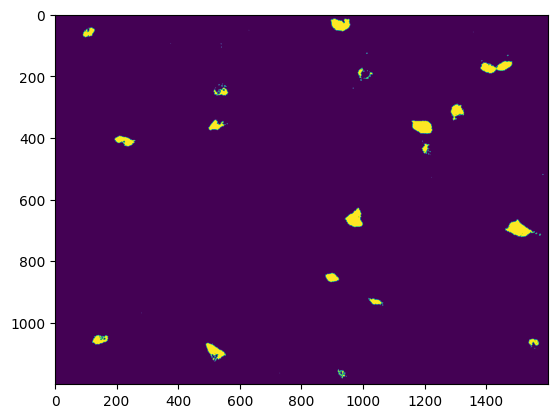

In [3]:
#_, thresholded = cv2.threshold(img1, 210, 255, cv2.THRESH_BINARY)
_, thresholded = cv2.threshold( img1 , 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresholded)

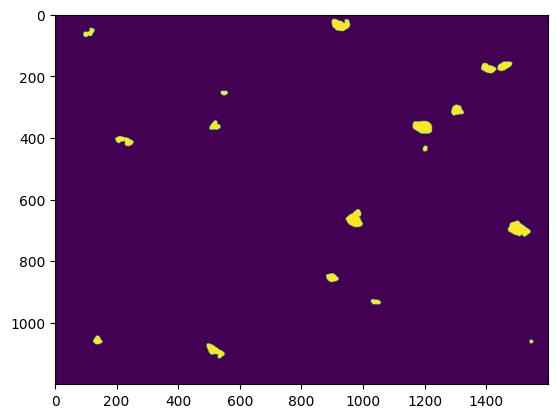

In [4]:
# b) Utilizando abertura com elemento circular de 11 pixels
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (12, 12))  # Elemento estruturante circular de 11 pixels
opened_image = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)

# Exibir as imagens resultantes
#cv2.imshow('Thresholded Image', thresholded)
plt.imshow( opened_image)

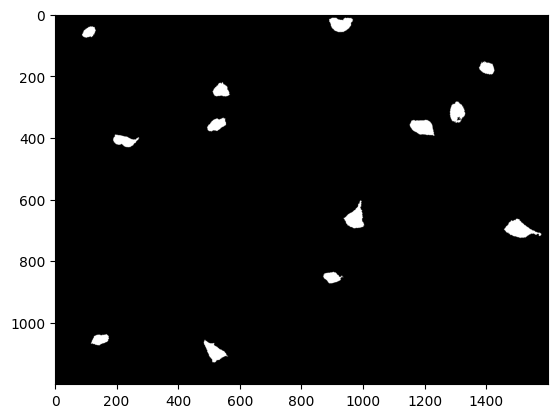

In [5]:
path = "C:/Users/Luis/Desktop/UFU/PDI/pgc111-labs-2023-02/project/fluocells/all_masks/masks/Mar19bS1C4R2_LHr_200x_y.png"
mask1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

plt.imshow(mask1, cmap='gray', vmin=0, vmax=255);

Text(0.5, 1.0, 'Mask')

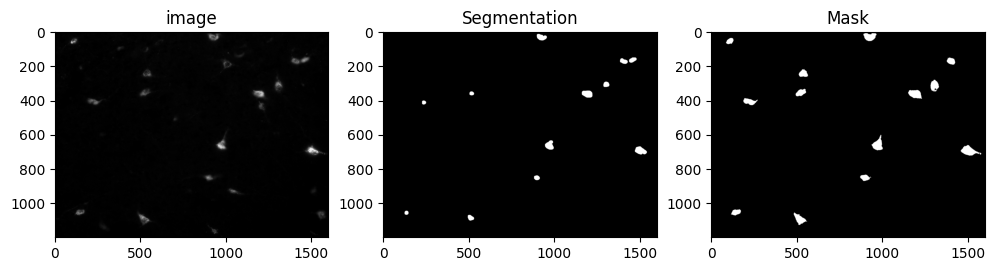

In [63]:
f, axarr = plt.subplots(1,3, figsize=(12,10))

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))  # Elemento estruturante circular de 11 pixels
opened_image = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)

path = "C:/Users/Luis/Desktop/UFU/PDI/pgc111-labs-2023-02/project/fluocells/all_masks/masks/Mar19bS1C4R2_LHr_200x_y.png"
mask1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

axarr[0].imshow(img1, cmap='gray')
axarr[1].imshow(opened_image, cmap='gray')
axarr[2].imshow(mask1, cmap='gray')

axarr[0].set_title('image')
axarr[1].set_title('Segmentation') 
axarr[2].set_title('Mask') 

In [64]:
segmentation =255- opened_image
mask = 255- mask1

In [65]:
def calculate_accuracy(segmentation_image, mask):
    # Ensure both images have the same shape
    if segmentation_image.shape != mask.shape:
        raise ValueError("Segmentation image and mask shape mismatch")

    # Convert images to grayscale if needed
    if len(segmentation_image.shape) > 2:
        segmentation_image = cv2.cvtColor(segmentation_image, cv2.COLOR_BGR2GRAY)
    if len(mask.shape) > 2:
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
    TP = np.sum(np.logical_and(segmentation_image == 255, mask == 255))
    TN = np.sum(np.logical_and(segmentation_image == 0, mask == 0))
    FP = np.sum(np.logical_and(segmentation_image == 255, mask == 0))
    FN = np.sum(np.logical_and(segmentation_image == 0, mask == 255))

    # Calculate accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN) * 100
    return accuracy

result_accuracy = calculate_accuracy(segmentation, mask1)
print("Accuracy:", result_accuracy)

Accuracy: 0.85671875


In [66]:
# Calculate True Positives, True Negatives, False Positives, False Negatives
TP = np.sum(np.logical_and(segmentation == 255, mask1 == 255))
TN = np.sum(np.logical_and(segmentation == 0, mask1 == 0))
FP = np.sum(np.logical_and(segmentation == 255, mask1 == 0))
FN = np.sum(np.logical_and(segmentation == 0, mask1 == 255))

# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN) * 100
accuracy

0.85671875

In [123]:
def convolution(mat1, mat2):
    return np.sum(mat1 * mat2)

def applyFilter(img, mask):
    varX = int( (mask.shape[0])/2 )
    varY = int( (mask.shape[1])/2 )
    newImg = np.zeros((img.shape[0]-2*varX, img.shape[1]-2*varY))
    for i in range(varX,img.shape[0]-varX):
        for j in range(varY,img.shape[1]-varY):
            newImg[i-varX,j-varY] = convolution(img[i-varX:i-varX+mask.shape[0],
                                                    j-varY:j-varY+mask.shape[1]], mask )
    return newImg

def realcefilter(img, mask, k=1):
    rest00 = applyFilter(img, mask)
    g_mask = img[1:img.shape[0]-1,1:img.shape[1]-1] - rest00
    return img[1:img1.shape[0]-1,1:img1.shape[1]-1] + k*g_mask


Text(0.5, 1.0, 'Mask')

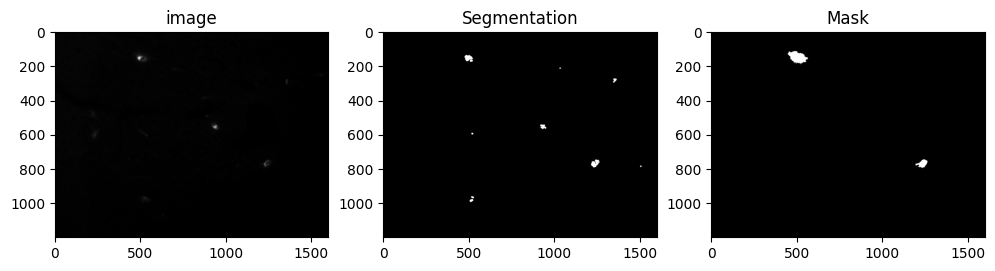

In [25]:
f, axarr = plt.subplots(1,3, figsize=(12,10))

pathImage = "C:/Users/Luis/Desktop/UFU/PDI/pgc111-labs-2023-02/project/fluocells/all_images/images/Mar20bS2C2R3_LHl_200x_y.png"
pathMask = pathImage.replace("all_images/images", "all_masks/masks")
img1 = cv2.imread(pathImage, cv2.IMREAD_GRAYSCALE)


#img1 = cv2.GaussianBlur(img1, (3, 3), 200)
image1 = cv2.GaussianBlur(img1, (3, 3), 2)

image = cv2.Laplacian(image1, cv2.CV_64F, ksize=3, scale=0.8)
#img1 = cv2.medianBlur(img1, 3)
#image = np.uint8( (image+image1)) 

grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Gradiente en dirección x
grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Gradiente en dirección y

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

magnitude_gradient = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

_, thresholded = cv2.threshold( magnitude_gradient , 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))  # Elemento estruturante circular de 11 pixels
opened_image = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)

#path = "C:/Users/Luis/Desktop/UFU/PDI/pgc111-labs-2023-02/project/fluocells/all_masks/masks/Mar19bS1C4R2_LHr_200x_y.png"
mask1 = cv2.imread(pathMask, cv2.IMREAD_GRAYSCALE)

axarr[0].imshow(img1, cmap='gray')
axarr[1].imshow(opened_image, cmap='gray')
axarr[2].imshow(mask1, cmap='gray')

axarr[0].set_title('image')
axarr[1].set_title('Segmentation') 
axarr[2].set_title('Mask') 

In [8]:
class Configuration:
    gaussianKernel = 3
    laplacianScale = 1.5
    gradX = 0.5
    gradY = 0.5
    kernel = None
    # result
    accuracy = 0

    def __init__(self, gaussianKernel, laplacianScale, gradX, gradY, kernelSize):
        self.gaussianKernel = gaussianKernel
        self.laplacianScale = laplacianScale
        self.gradX = gradX
        self.gradY = gradY
        self.generateKernel(kernelSize)
    
    def generateKernel(self, size):
        random_kernel = np.random.randint(2, size=(size, size))
        self.kernel = random_kernel
    
    def showConfiguration(self):
        print(f"Configuration: Gaussian Kernel: {self.gaussianKernel}, Laplacian Scale: {self.laplacianScale}, Gradient X: {self.gradX}, Gradient Y: {self.gradY}, Kernel: {self.kernel}, Accuracy: {self.accuracy}")

    def calculateAccuracyBlock(self, listImages):
        self.accuracy = np.mean( [ self.calculateAccuracy(img) for img in listImages ] )

    def calculateAccuracy(self, pathImage):
        #pathImage = "C:/Users/Luis/Desktop/UFU/PDI/pgc111-labs-2023-02/project/fluocells/all_images/images/Mar20bS2C2R3_LHl_200x_y.png"
        pathMask = pathImage.replace("all_images/images", "all_masks/masks")

        img1 = cv2.imread(pathImage, cv2.IMREAD_GRAYSCALE)
        image1 = cv2.GaussianBlur(img1, (self.gaussianKernel, self.gaussianKernel), 3)
        image = cv2.Laplacian(image1, cv2.CV_64F, ksize=3, scale=self.laplacianScale)
        grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Gradiente en dirección x
        grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Gradiente en dirección y
        abs_grad_x = cv2.convertScaleAbs(grad_x)
        abs_grad_y = cv2.convertScaleAbs(grad_y)
        magnitude_gradient = cv2.addWeighted(abs_grad_x, self.gradX, abs_grad_y, self.gradY, 0)
        _, thresholded = cv2.threshold( magnitude_gradient , 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        #self.generateKernel()
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
        opened_image = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)
        mask = cv2.imread(pathMask, cv2.IMREAD_GRAYSCALE)
        return self.calculate_accuracy(opened_image, mask)
    
    def setAccuracy(self, accuracy):
        self.accuracy = accuracy

    def getAccuracy(self):
        return self.accuracy

    def calculate_accuracy(self, segmentation_image, mask):
        segmentation_image = 255 - segmentation_image
        mask = 255 - mask
        if segmentation_image.shape != mask.shape:
            raise ValueError("Segmentation image and mask shape mismatch")
        
        if len(segmentation_image.shape) > 2:
            segmentation_image = cv2.cvtColor(segmentation_image, cv2.COLOR_BGR2GRAY)
        if len(mask.shape) > 2:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

        # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
        TP = np.sum(np.logical_and(segmentation_image == 255, mask == 255))
        TN = np.sum(np.logical_and(segmentation_image == 0, mask == 0))
        FP = np.sum(np.logical_and(segmentation_image == 255, mask == 0))
        FN = np.sum(np.logical_and(segmentation_image == 0, mask == 255))

        accuracy = (TP + TN) / (TP + TN + FP + FN) * 100
        return accuracy
    
    def get_image_and_mask(self, pathImage):
        pathMask = pathImage.replace("all_images/images", "all_masks/masks")
        img1 = cv2.imread(pathImage, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(pathMask, cv2.IMREAD_GRAYSCALE)
        return img1, mask
    
    def calculate_sensitivity(self, segmentation_image, mask):
        segmentation_image = 255 - segmentation_image
        mask = 255 - mask
        if segmentation_image.shape != mask.shape:
            raise ValueError("Segmentation image and mask shape mismatch")
        
        if len(segmentation_image.shape) > 2:
            segmentation_image = cv2.cvtColor(segmentation_image, cv2.COLOR_BGR2GRAY)
        if len(mask.shape) > 2:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

        # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
        TP = np.sum(np.logical_and(segmentation_image == 255, mask == 255))
        FN = np.sum(np.logical_and(segmentation_image == 0, mask == 255))

        sensitivity = TP / (TP + FN) * 100
        return sensitivity
    
    def calculate_specificity(self, segmentation_image, mask):
        segmentation_image = 255 - segmentation_image
        mask = 255 - mask
        if segmentation_image.shape != mask.shape:
            raise ValueError("Segmentation image and mask shape mismatch")
        
        if len(segmentation_image.shape) > 2:
            segmentation_image = cv2.cvtColor(segmentation_image, cv2.COLOR_BGR2GRAY)
        if len(mask.shape) > 2:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

        # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
        TN = np.sum(np.logical_and(segmentation_image == 0, mask == 0))
        FP = np.sum(np.logical_and(segmentation_image == 255, mask == 0))

        specificity = TN / (TN + FP) * 100
        return specificity
    
    def calculate_metrics(self, segmentation_image, mask):
        segmentation_image = 255 - segmentation_image
        mask = 255 - mask
        if segmentation_image.shape != mask.shape:
            raise ValueError("Segmentation image and mask shape mismatch")
        
        if len(segmentation_image.shape) > 2:
            segmentation_image = cv2.cvtColor(segmentation_image, cv2.COLOR_BGR2GRAY)
        if len(mask.shape) > 2:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

        # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
        TP = np.sum(np.logical_and(segmentation_image == 255, mask == 255))
        TN = np.sum(np.logical_and(segmentation_image == 0, mask == 0))
        FP = np.sum(np.logical_and(segmentation_image == 255, mask == 0))
        FN = np.sum(np.logical_and(segmentation_image == 0, mask == 255))

        accuracy = (TP + TN) / (TP + TN + FP + FN) * 100

        sensitivity = TP / (TP + FN) * 100

        specificity = TN / (TN + FP) * 100

        return accuracy, sensitivity, specificity
    
    def calculate_iou(self, mask1, mask2):
        intersection = np.logical_and(mask1, mask2)
        union = np.logical_or(mask1, mask2)
        iou_score = np.sum(intersection) / np.sum(union)
        return iou_score
    
    def calculate_iou_Block(self, listImages):
        iou_scores = []
        for imagePath in listImages:
            img, mask = self.get_image_and_mask(imagePath)
            # Assuming self.accuracy has already been calculated using Jaccard index
            iou_score = self.calculate_iou(img, mask)
            #print(iou_score)
            iou_scores.append(iou_score)
        if iou_scores:
            mean_iou = np.mean(iou_scores)
        else:
            mean_iou = 0.0  # Set default IoU if no scores calculated
        self.accuracy = mean_iou

    def calculate_jaccard_index_Block(self, listImages):
        jaccard_scores = []
        for imagePath in listImages:
            img, mask = self.get_image_and_mask(imagePath)
            jaccard_score = self.calculate_jaccard_index(img, mask)
            jaccard_scores.append(jaccard_score)
        self.accuracy = np.mean( jaccard_scores )
    
    def calculate_jaccard_index(self, segmentation_image, mask):
        segmentation_image = 255 - segmentation_image
        mask = 255 - mask
        if segmentation_image.shape != mask.shape:
            raise ValueError("Segmentation image and mask shape mismatch")
        intersection = np.sum(np.logical_and(segmentation_image == 255, mask == 255))
        union = np.sum(np.logical_or(segmentation_image == 255, mask == 255))

        iou = intersection / union
        return iou
    
    def calculate_log_loss(self, y_pred, y_true):
        epsilon = 1e-15  # Adding a small value to prevent log(0)
        # Clip predicted values to avoid log(0) or log(1)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        # Compute Log Loss
        log_loss = - np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        
        return log_loss
    
    def calculate_log_loss_block(self, listImages, listPredictions):
    # listImages: Paths to the images
    # listPredictions: Predicted probabilities for each image
        log_losses = []
        
        for i, pathImage in enumerate(listImages):
            # Load image, perform processing, and obtain true labels (ground truth)
            processed_image = self.process_image(pathImage)  # Process the image using your defined method
            true_labels = self.get_true_labels(pathImage)  # Get true labels corresponding to the image
            
            # Calculate log loss using predicted probabilities and true labels
            log_loss = self.calculate_log_loss(true_labels, listPredictions[i])
            log_losses.append(log_loss)
        
        mean_log_loss = np.mean(log_losses)
        return mean_log_loss

In [10]:
def generateRandomConfigurations(num_configs):
    configurations = []
    
    for _ in range(num_configs):
        gaussianKernel = random.choice([5,7,9]) # Range for gaussianKernel
        laplacianScale = random.uniform(1.0, 5.0)  # Range for laplacianScale
        randWeight = random.uniform(0.1, 0.6)
        gradX = randWeight  # Range for gradX
        gradY = 1-randWeight  # Range for gradY
        kernelSize = random.choice([5,7,9])

        new_config = Configuration(gaussianKernel, laplacianScale, gradX, gradY, kernelSize)
        configurations.append(new_config)

    return configurations

In [7]:
folder_path = 'C:/Users/Luis/Desktop/UFU/PDI/pgc111-labs-2023-02/project/fluocells/all_images/images/'  # Replace this with the path to your folder

files_list = []
# Check if the folder path exists
if os.path.exists(folder_path):
    files_list = os.listdir(folder_path)
    files_list = [folder_path + file  for file in files_list]
else:
    print("The specified folder path does not exist.")

In [9]:
selected_files = random.sample(files_list, 200)
random_configs = generateRandomConfigurations(100)

In [135]:
def findBestConfiguration(configurations, selected_files):
    num_configs = len(configurations)
    best_accuracy = -1  
    best_config = None

    for idx, config in enumerate(configurations, 1):
        config.calculateAccuracyBlock(selected_files)

        if config.accuracy > best_accuracy:
            best_accuracy = config.accuracy
            best_config = config
        # Calculate progress percentage
        progress = (idx / num_configs) * 100
        print(f"Progress: {progress:.2f}% Complete", end="\r")  # Print progress message

    print("\nCalculation Complete!")  # Print completion message
    return best_config

findBestConfiguration(random_configs, selected_files)

Progress: 100.00% Complete
Calculation Complete!


In [125]:
dict_img_acc = {}
aux = [config.getAccuracy() for config in random_configs]
for i in range(0, len(aux)):
    dict_img_acc[i] = random_configs[i].getAccuracy()
sorted_dict_desc = dict(sorted(dict_img_acc.items(), key=lambda item: item[1], reverse=True))
print(sorted_dict_desc)

In [126]:
sorted_dict_desc = dict(sorted(dict_img_acc.items(), key=lambda item: item[1], reverse=True))
print(sorted_dict_desc)

{14: 99.457920612417, 19: 99.45438186437681, 73: 99.45419249960356, 67: 99.4532905652583, 32: 99.4530322769982, 0: 99.45282753410088, 51: 99.4508865794089, 45: 99.45053043376414, 88: 99.45000496519734, 96: 99.44877000223588, 44: 99.44830288791822, 82: 99.44828352201566, 37: 99.44827078637941, 76: 99.4477295617833, 78: 99.44762478109904, 38: 99.44760851899991, 74: 99.44759993260821, 50: 99.44754411990475, 89: 99.44638269448907, 64: 99.44637555594079, 69: 99.44610453627637, 90: 99.44555458135818, 28: 99.4451766777497, 91: 99.4446684727015, 65: 99.44455339007854, 98: 99.44366891920603, 41: 99.44361136315962, 24: 99.4434230109644, 80: 99.44297269718226, 21: 99.44181679192498, 84: 99.44149239100727, 2: 99.44103108726605, 56: 99.43959292317614, 61: 99.43876102639724, 94: 99.43750047786425, 11: 99.43576276111793, 77: 99.43558101653562, 63: 99.43521420623276, 59: 99.43443804417308, 46: 99.43440941131763, 33: 99.43375769428914, 22: 99.43366060861102, 87: 99.43354392509482, 93: 99.43343112002782

Text(0.5, 1.0, 'Mask')

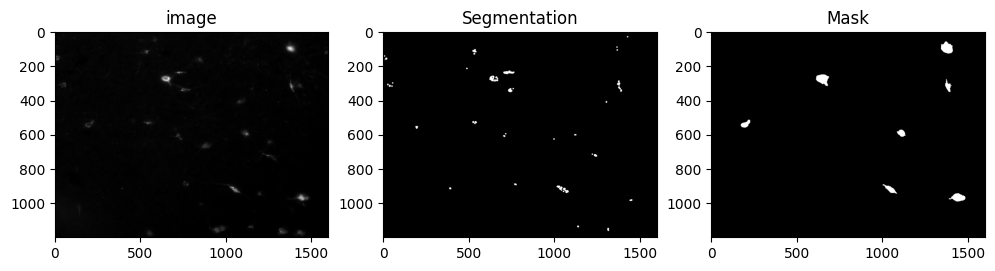

In [133]:
f, axarr = plt.subplots(1,3, figsize=(12,10))

pathTemp = selected_files[16]
image = cv2.imread(pathTemp, cv2.IMREAD_GRAYSCALE)
aux1, aux2 = getImageAndMask(pathTemp, random_configs[14])

axarr[0].imshow(image, cmap='gray')
axarr[1].imshow(aux1, cmap='gray')
axarr[2].imshow(aux2, cmap='gray')

axarr[0].set_title('image')
axarr[1].set_title('Segmentation') 
axarr[2].set_title('Mask') 

In [11]:
temp = 0
max = 0
indexMax = 0
for index in range(0, len(random_configs)):
    temp = random_configs[index].getAccuracy()
    if max < temp:
        max = temp 
        indexMax = index
        print(indexMax)
    #if temp > 99.3:
    #    print(index)

0
1
21


In [121]:
random_configs[65].showConfiguration()

Configuration: Gaussian Kernel: 7, Laplacian Scale: 1.478120211175103, Gradient X: 0.26715975831442684, Gradient Y: 0.7328402416855732, Kernel: [[1 1 1 0 0]
 [0 1 1 1 1]
 [0 0 0 0 0]
 [1 1 1 0 0]
 [0 1 0 0 1]], Accuracy: 99.45866424660836


In [22]:
random_configs[21].showConfiguration()

Configuration: Gaussian Kernel: 7, Laplacian Scale: 1.8176141546786135, Gradient X: 0.3193451458431037, Gradient Y: 0.6806548541568963, Kernel: [[1 1 0]
 [1 1 1]
 [1 0 1]], Accuracy: 99.35955611239348


In [76]:
random_configs[26].showConfiguration()

Configuration: Gaussian Kernel: 5, Laplacian Scale: 2.0911829175166456, Gradient X: 0.3231898821492899, Gradient Y: 0.6768101178507101, Kernel: [[1 0 1 1 1]
 [1 0 1 1 0]
 [1 0 1 0 0]
 [0 0 1 0 1]
 [1 1 0 0 1]], Accuracy: 99.30495215588603


In [77]:
random_configs[39].showConfiguration()

Configuration: Gaussian Kernel: 7, Laplacian Scale: 4.169351481891743, Gradient X: 0.7948059474273625, Gradient Y: 0.20519405257263745, Kernel: [[0 0 1]
 [0 0 0]
 [1 0 0]], Accuracy: 99.28818823253795


In [106]:
random_configs[7].showConfiguration()

Configuration: Gaussian Kernel: 7, Laplacian Scale: 1.492475891823934, Gradient X: 0.2590536358057025, Gradient Y: 0.7409463641942975, Kernel: [[1 0 1]
 [1 0 0]
 [0 1 1]], Accuracy: 99.4600835640263


In [74]:
random_configs[17].calculate_iou(aux1, aux2)

0.16828793774319067

Text(0.5, 1.0, 'Mask')

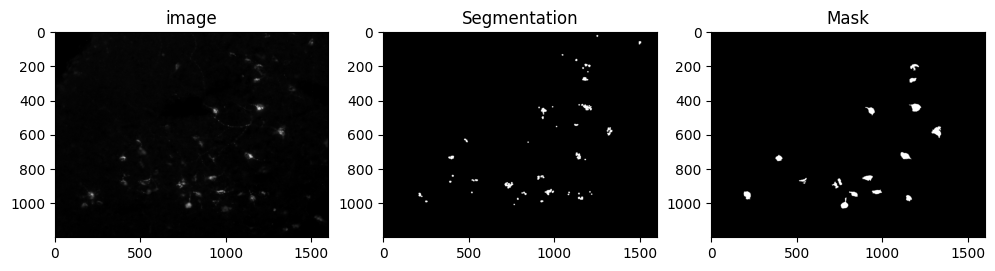

In [116]:
f, axarr = plt.subplots(1,3, figsize=(12,10))

pathTemp = selected_files[81]
image = cv2.imread(pathTemp, cv2.IMREAD_GRAYSCALE)
aux1, aux2 = getImageAndMask(pathTemp, random_configs[7])

axarr[0].imshow(image, cmap='gray')
axarr[1].imshow(aux1, cmap='gray')
axarr[2].imshow(aux2, cmap='gray')

axarr[0].set_title('image')
axarr[1].set_title('Segmentation') 
axarr[2].set_title('Mask') 

In [57]:
class Configuration:
    gaussianKernel = 3
    laplacianScale = 1.5
    gradX = 0.5
    gradY = 0.5
    kernel = None
    kernel_1 = None
    # result
    accuracy = 0

    def __init__(self, gaussianKernel, laplacianScale, gradX, gradY, kernelSize):
        self.gaussianKernel = gaussianKernel
        self.laplacianScale = laplacianScale
        self.gradX = gradX
        self.gradY = gradY
        self.generateKernel(kernelSize)
    
    def generateKernel(self, size):
        #random_kernel = np.random.randint(2, size=(size, size))
        random_matrix = np.random.randint(2, size=(size, size), dtype=np.uint8)
        self.kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (size, size))
        self.kernel[:] = random_matrix

        random_matrix = np.random.randint(2, size=(size, size), dtype=np.uint8)
        self.kernel_1 = cv2.getStructuringElement(cv2.MORPH_RECT, (size, size))
        self.kernel_1[:] = random_matrix
        #self.kernel = random_kernel
    
    def showConfiguration(self):
        print(f"Configuration: Gaussian Kernel: {self.gaussianKernel}, Laplacian Scale: {self.laplacianScale}, Gradient X: {self.gradX}, Gradient Y: {self.gradY}, Kernel: {self.kernel}, Accuracy: {self.accuracy}")

    def calculateAccuracyBlock(self, listImages):
        self.accuracy = np.mean( [ self.calculateAccuracy(img) for img in listImages ] )

    def calculateAccuracy(self, pathImage):
        # Generate the mask path
        pathMask = pathImage.replace("all_images/images", "all_masks/masks")

        img = cv2.imread(pathImage, cv2.IMREAD_GRAYSCALE)
        
        #img_equalized = cv2.equalizeHist(img)

        blurred_image = cv2.GaussianBlur(img, (self.gaussianKernel, self.gaussianKernel), 3)

        grad_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
        grad_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)
        abs_grad_x = cv2.convertScaleAbs(grad_x)
        abs_grad_y = cv2.convertScaleAbs(grad_y)
        # Combine gradients to get the magnitude
        magnitude_gradient = cv2.addWeighted(abs_grad_x, self.gradX, abs_grad_y, self.gradY, 0)
        
        blurred_image = cv2.GaussianBlur(magnitude_gradient, (self.gaussianKernel, self.gaussianKernel), 3)

        grad_x_1 = cv2.Sobel(magnitude_gradient, cv2.CV_64F, 1, 0, ksize=3)
        grad_y_1 = cv2.Sobel(magnitude_gradient, cv2.CV_64F, 0, 1, ksize=3)
        abs_grad_x_1 = cv2.convertScaleAbs(grad_x_1)
        abs_grad_y_1 = cv2.convertScaleAbs(grad_y_1)
        # Apply thresholding
        magnitude_gradient = cv2.addWeighted(abs_grad_x_1, self.gradX, abs_grad_y_1, self.gradY, 0)

        blurred_image = cv2.GaussianBlur(magnitude_gradient, (self.gaussianKernel, self.gaussianKernel), 3)

        _, thresholded = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_OTSU)

        opened_image = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, self.kernel)
        opened_image_2 = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, self.kernel_1)

        combined_image = cv2.bitwise_and(opened_image, opened_image_2)
        # Read the mask image
        mask = cv2.imread(pathMask, cv2.IMREAD_GRAYSCALE)
        # Calculate and return accuracy
        return self.calculate_accuracy(combined_image, mask)

    
    def setAccuracy(self, accuracy):
        self.accuracy = accuracy

    def getAccuracy(self):
        return self.accuracy

    def calculate_accuracy(self, segmentation_image, mask):
        segmentation_image = 255 - segmentation_image
        mask = 255 - mask
        if segmentation_image.shape != mask.shape:
            raise ValueError("Segmentation image and mask shape mismatch")
        
        if len(segmentation_image.shape) > 2:
            segmentation_image = cv2.cvtColor(segmentation_image, cv2.COLOR_BGR2GRAY)
        if len(mask.shape) > 2:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

        # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
        TP = np.sum(np.logical_and(segmentation_image == 255, mask == 255))
        TN = np.sum(np.logical_and(segmentation_image == 0, mask == 0))
        FP = np.sum(np.logical_and(segmentation_image == 255, mask == 0))
        FN = np.sum(np.logical_and(segmentation_image == 0, mask == 255))

        accuracy = (TP + TN) / (TP + TN + FP + FN) * 100
        return accuracy
    
    def get_image_and_mask(self, pathImage):
        pathMask = pathImage.replace("all_images/images", "all_masks/masks")
        img1 = cv2.imread(pathImage, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(pathMask, cv2.IMREAD_GRAYSCALE)
        return img1, mask
    
    def calculate_sensitivity(self, segmentation_image, mask):
        segmentation_image = 255 - segmentation_image
        mask = 255 - mask
        if segmentation_image.shape != mask.shape:
            raise ValueError("Segmentation image and mask shape mismatch")
        
        if len(segmentation_image.shape) > 2:
            segmentation_image = cv2.cvtColor(segmentation_image, cv2.COLOR_BGR2GRAY)
        if len(mask.shape) > 2:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

        # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
        TP = np.sum(np.logical_and(segmentation_image == 255, mask == 255))
        FN = np.sum(np.logical_and(segmentation_image == 0, mask == 255))

        sensitivity = TP / (TP + FN) * 100
        return sensitivity
    
    def calculate_specificity(self, segmentation_image, mask):
        segmentation_image = 255 - segmentation_image
        mask = 255 - mask
        if segmentation_image.shape != mask.shape:
            raise ValueError("Segmentation image and mask shape mismatch")
        
        if len(segmentation_image.shape) > 2:
            segmentation_image = cv2.cvtColor(segmentation_image, cv2.COLOR_BGR2GRAY)
        if len(mask.shape) > 2:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

        # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
        TN = np.sum(np.logical_and(segmentation_image == 0, mask == 0))
        FP = np.sum(np.logical_and(segmentation_image == 255, mask == 0))

        specificity = TN / (TN + FP) * 100
        return specificity
    
    def calculate_metrics(self, segmentation_image, mask):
        segmentation_image = 255 - segmentation_image
        mask = 255 - mask
        if segmentation_image.shape != mask.shape:
            raise ValueError("Segmentation image and mask shape mismatch")
        
        if len(segmentation_image.shape) > 2:
            segmentation_image = cv2.cvtColor(segmentation_image, cv2.COLOR_BGR2GRAY)
        if len(mask.shape) > 2:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

        # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
        TP = np.sum(np.logical_and(segmentation_image == 255, mask == 255))
        TN = np.sum(np.logical_and(segmentation_image == 0, mask == 0))
        FP = np.sum(np.logical_and(segmentation_image == 255, mask == 0))
        FN = np.sum(np.logical_and(segmentation_image == 0, mask == 255))

        accuracy = (TP + TN) / (TP + TN + FP + FN) * 100

        sensitivity = TP / (TP + FN) * 100

        specificity = TN / (TN + FP) * 100

        return accuracy, sensitivity, specificity
    
    def calculate_iou(self, mask1, mask2):
        intersection = np.logical_and(mask1, mask2)
        union = np.logical_or(mask1, mask2)
        iou_score = np.sum(intersection) / np.sum(union)
        return iou_score
    
    def calculate_iou_Block(self, listImages):
        iou_scores = []
        for imagePath in listImages:
            img, mask = self.get_image_and_mask(imagePath)
            # Assuming self.accuracy has already been calculated using Jaccard index
            iou_score = self.calculate_iou(img, mask)
            #print(iou_score)
            iou_scores.append(iou_score)
        if iou_scores:
            mean_iou = np.mean(iou_scores)
        else:
            mean_iou = 0.0  # Set default IoU if no scores calculated
        self.accuracy = mean_iou

    def calculate_jaccard_index_Block(self, listImages):
        jaccard_scores = []
        for imagePath in listImages:
            img, mask = self.get_image_and_mask(imagePath)
            jaccard_score = self.calculate_jaccard_index(img, mask)
            jaccard_scores.append(jaccard_score)
        self.accuracy = np.mean( jaccard_scores )
    
    def calculate_jaccard_index(self, segmentation_image, mask):
        segmentation_image = 255 - segmentation_image
        mask = 255 - mask
        if segmentation_image.shape != mask.shape:
            raise ValueError("Segmentation image and mask shape mismatch")
        intersection = np.sum(np.logical_and(segmentation_image == 255, mask == 255))
        union = np.sum(np.logical_or(segmentation_image == 255, mask == 255))

        iou = intersection / union
        return iou
    
    def calculate_log_loss(self, y_pred, y_true):
        epsilon = 1e-15  # Adding a small value to prevent log(0)
        # Clip predicted values to avoid log(0) or log(1)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        # Compute Log Loss
        log_loss = - np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        
        return log_loss
    
    def calculate_log_loss_block(self, listImages, listPredictions):
    # listImages: Paths to the images
    # listPredictions: Predicted probabilities for each image
        log_losses = []
        
        for i, pathImage in enumerate(listImages):
            # Load image, perform processing, and obtain true labels (ground truth)
            processed_image = self.process_image(pathImage)  # Process the image using your defined method
            true_labels = self.get_true_labels(pathImage)  # Get true labels corresponding to the image
            
            # Calculate log loss using predicted probabilities and true labels
            log_loss = self.calculate_log_loss(true_labels, listPredictions[i])
            log_losses.append(log_loss)
        
        mean_log_loss = np.mean(log_losses)
        return mean_log_loss

In [137]:
class Configuration:
    gaussianKernel = 3
    laplacianScale = 1.5
    gradX = 0.5
    gradY = 0.5
    kernel_0 = None
    kernel_1 = None
    kernel_2 = None
    kernel_3 = None
    # result
    accuracy = 0

    def __init__(self, gaussianKernel, laplacianScale, gradX, gradY, kernelSize):
        self.gaussianKernel = gaussianKernel
        self.laplacianScale = laplacianScale
        self.gradX = gradX
        self.gradY = gradY
        self.generateKernel(kernelSize)
    
    def generateKernel(self, size):
        #random_kernel = np.random.randint(2, size=(size, size))
        random_matrix = np.random.randint(2, size=(size, size), dtype=np.uint8)
        self.kernel_0 = cv2.getStructuringElement(cv2.MORPH_RECT, (size, size))
        self.kernel_0[:] = random_matrix
        
        random_matrix = np.random.randint(2, size=(size, size), dtype=np.uint8)
        self.kernel_1 = cv2.getStructuringElement(cv2.MORPH_RECT, (size, size))
        self.kernel_1[:] = random_matrix

        random_matrix = np.random.randint(2, size=(size, size), dtype=np.uint8)
        self.kernel_2 = cv2.getStructuringElement(cv2.MORPH_RECT, (size, size))
        self.kernel_2[:] = random_matrix

        random_matrix = np.random.randint(2, size=(size, size), dtype=np.uint8)
        self.kernel_3 = cv2.getStructuringElement(cv2.MORPH_RECT, (size, size))
        self.kernel_3[:] = random_matrix
    
    def showConfiguration(self):
        print(f"Configuration: Gaussian Kernel: {self.gaussianKernel}, Laplacian Scale: {self.laplacianScale}, Gradient X: {self.gradX}, Gradient Y: {self.gradY}, Kernel: {self.kernel}, Accuracy: {self.accuracy}")

    def calculateAccuracyBlock(self, listImages):
        self.accuracy = np.mean( [ self.processStructure(img) for img in listImages ] )

    def layerConv(self, img, kernel_size, gauss_sigma, grad_x, grad_y, morf_kernel):

        blurred_image = cv2.GaussianBlur(img, (kernel_size, kernel_size), gauss_sigma)
        grad_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
        grad_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)
        abs_grad_x = cv2.convertScaleAbs(grad_x)
        abs_grad_y = cv2.convertScaleAbs(grad_y)
        magnitude_gradient = cv2.addWeighted(abs_grad_x, self.gradX, abs_grad_y, self.gradY, 0)

        #imgAux = (img-blurred_image) + magnitude_gradient

        _, thresholded = cv2.threshold(magnitude_gradient, 0, 255, cv2.THRESH_OTSU)

        opened_image = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, morf_kernel)

        return opened_image

    def getTransformations(self, pathImage):
        # Generate the mask path
        pathMask = pathImage.replace("all_images/images", "all_masks/masks")
        img = cv2.imread(pathImage, cv2.IMREAD_GRAYSCALE)
        
        lyr0 = self.layerConv(img, self.gaussianKernel, 5, self.gradX, self.gradY, self.kernel_0)
        lyr1 = self.layerConv(img, self.gaussianKernel, 4, self.gradX, self.gradY, self.kernel_1)
        lyr2 = self.layerConv(img, self.gaussianKernel, 3, self.gradX, self.gradY, self.kernel_2)
        lyr3 = self.layerConv(img, self.gaussianKernel, 1, self.gradX, self.gradY, self.kernel_3)
        #opened_image = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, self.kernel)
        #opened_image_2 = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, self.kernel_1)

        combined_image = cv2.bitwise_and(lyr0, lyr1)
        combined_image = cv2.bitwise_and(combined_image, lyr2)
        combined_image = cv2.bitwise_and(combined_image, lyr3)
        # Read the mask image
        close_image= cv2.morphologyEx(combined_image, cv2.MORPH_CLOSE, self.kernel_1)
        
        return lyr0, lyr1, lyr2, lyr3, close_image, mask

    def processStructure(self, pathImage):
        # Generate the mask path
        pathMask = pathImage.replace("all_images/images", "all_masks/masks")
        img = cv2.imread(pathImage, cv2.IMREAD_GRAYSCALE)
        
        lyr0, lyr1, lyr2, lyr3, close_image, mask = self.getTransformations(pathImage)

        mask = cv2.imread(pathMask, cv2.IMREAD_GRAYSCALE)
        # Calculate and return accuracy
        return self.calculate_accuracy(close_image, mask)
    
    def setAccuracy(self, accuracy):
        self.accuracy = accuracy

    def getAccuracy(self):
        return self.accuracy

    def calculate_accuracy(self, segmentation_image, mask):
        segmentation_image = 255 - segmentation_image
        mask = 255 - mask
        if segmentation_image.shape != mask.shape:
            raise ValueError("Segmentation image and mask shape mismatch")
        
        if len(segmentation_image.shape) > 2:
            segmentation_image = cv2.cvtColor(segmentation_image, cv2.COLOR_BGR2GRAY)
        if len(mask.shape) > 2:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

        # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
        TP = np.sum(np.logical_and(segmentation_image == 255, mask == 255))
        TN = np.sum(np.logical_and(segmentation_image == 0, mask == 0))
        FP = np.sum(np.logical_and(segmentation_image == 255, mask == 0))
        FN = np.sum(np.logical_and(segmentation_image == 0, mask == 255))

        accuracy = (TP + TN) / (TP + TN + FP + FN) * 100
        return accuracy
    
    def get_image_and_mask(self, pathImage):
        pathMask = pathImage.replace("all_images/images", "all_masks/masks")
        img1 = cv2.imread(pathImage, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(pathMask, cv2.IMREAD_GRAYSCALE)
        return img1, mask
    
    def calculate_sensitivity(self, segmentation_image, mask):
        segmentation_image = 255 - segmentation_image
        mask = 255 - mask
        if segmentation_image.shape != mask.shape:
            raise ValueError("Segmentation image and mask shape mismatch")
        
        if len(segmentation_image.shape) > 2:
            segmentation_image = cv2.cvtColor(segmentation_image, cv2.COLOR_BGR2GRAY)
        if len(mask.shape) > 2:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

        # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
        TP = np.sum(np.logical_and(segmentation_image == 255, mask == 255))
        FN = np.sum(np.logical_and(segmentation_image == 0, mask == 255))

        sensitivity = TP / (TP + FN) * 100
        return sensitivity
    
    def calculate_specificity(self, segmentation_image, mask):
        segmentation_image = 255 - segmentation_image
        mask = 255 - mask
        if segmentation_image.shape != mask.shape:
            raise ValueError("Segmentation image and mask shape mismatch")
        
        if len(segmentation_image.shape) > 2:
            segmentation_image = cv2.cvtColor(segmentation_image, cv2.COLOR_BGR2GRAY)
        if len(mask.shape) > 2:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

        # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
        TN = np.sum(np.logical_and(segmentation_image == 0, mask == 0))
        FP = np.sum(np.logical_and(segmentation_image == 255, mask == 0))

        specificity = TN / (TN + FP) * 100
        return specificity
    
    def calculate_metrics(self, segmentation_image, mask):
        segmentation_image = 255 - segmentation_image
        mask = 255 - mask
        if segmentation_image.shape != mask.shape:
            raise ValueError("Segmentation image and mask shape mismatch")
        
        if len(segmentation_image.shape) > 2:
            segmentation_image = cv2.cvtColor(segmentation_image, cv2.COLOR_BGR2GRAY)
        if len(mask.shape) > 2:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

        # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
        TP = np.sum(np.logical_and(segmentation_image == 255, mask == 255))
        TN = np.sum(np.logical_and(segmentation_image == 0, mask == 0))
        FP = np.sum(np.logical_and(segmentation_image == 255, mask == 0))
        FN = np.sum(np.logical_and(segmentation_image == 0, mask == 255))

        accuracy = (TP + TN) / (TP + TN + FP + FN) * 100

        sensitivity = TP / (TP + FN) * 100

        specificity = TN / (TN + FP) * 100

        return accuracy, sensitivity, specificity

In [ ]:
def getImageAndMask(pathImage, conf):
    #pathImage = "C:/Users/Luis/Desktop/UFU/PDI/pgc111-labs-2023-02/project/fluocells/all_images/images/Mar20bS2C2R3_LHl_200x_y.png"
    pathMask = pathImage.replace("all_images/images", "all_masks/masks")

    img1 = cv2.imread(pathImage, cv2.IMREAD_GRAYSCALE)
    image1 = cv2.GaussianBlur(img1, (conf.gaussianKernel, conf.gaussianKernel), 3)
    image = cv2.Laplacian(image1, cv2.CV_64F, ksize=3, scale=conf.laplacianScale)
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Gradiente en dirección x
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Gradiente en dirección y
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    magnitude_gradient = cv2.addWeighted(abs_grad_x, conf.gradX, abs_grad_y, conf.gradY, 0)
    _, thresholded = cv2.threshold( magnitude_gradient , 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        #self.generateKernel()
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
    opened_image = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)
    mask = cv2.imread(pathMask, cv2.IMREAD_GRAYSCALE)
    return opened_image, mask

In [139]:
def findBestConfiguration(configurations, selected_files):
    num_configs = len(configurations)
    best_accuracy = -1  
    best_config = None

    for idx, config in enumerate(configurations, 1):
        config.calculateAccuracyBlock(selected_files)

        if config.accuracy > best_accuracy:
            best_accuracy = config.accuracy
            best_config = config
        # Calculate progress percentage
        progress = (idx / num_configs) * 100
        print(f"Progress: {progress:.2f}% Complete", end="\r")  # Print progress message

    print("\nCalculation Complete!")  # Print completion message
    return best_config

findBestConfiguration(random_configs, selected_files)

Progress: 100.00% Complete
Calculation Complete!


In [138]:
selected_files = random.sample(files_list, 50)
random_configs = generateRandomConfigurations(5)

In [140]:
dict_img_acc = {}
aux = [config.getAccuracy() for config in random_configs]
for i in range(0, len(aux)):
    dict_img_acc[i] = random_configs[i].getAccuracy()
sorted_dict_desc = dict(sorted(dict_img_acc.items(), key=lambda item: item[1], reverse=True))
print(sorted_dict_desc)

{2: 99.41375136499703, 3: 99.40271688888296, 4: 99.30726797715766, 1: 99.29306238273635, 0: 99.07174235798304}


In [87]:
random_configs[9].showConfiguration()

AttributeError: 'Configuration' object has no attribute 'kernel'

In [98]:
random_configs[1].kernel_2

array([[1, 0, 0, 0, 0],
       [0, 1, 1, 1, 1],
       [0, 0, 0, 1, 0],
       [1, 1, 0, 0, 1],
       [0, 1, 0, 1, 1]], dtype=uint8)

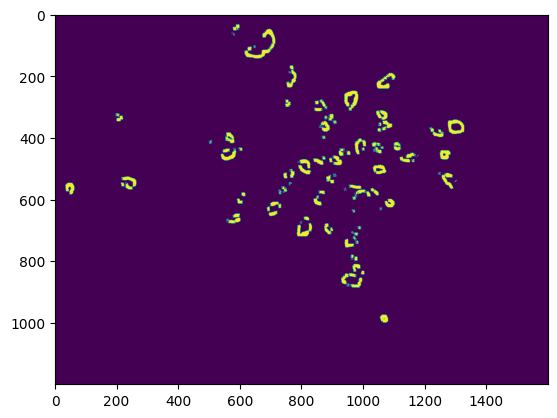

In [134]:
plt.imshow(aux3)

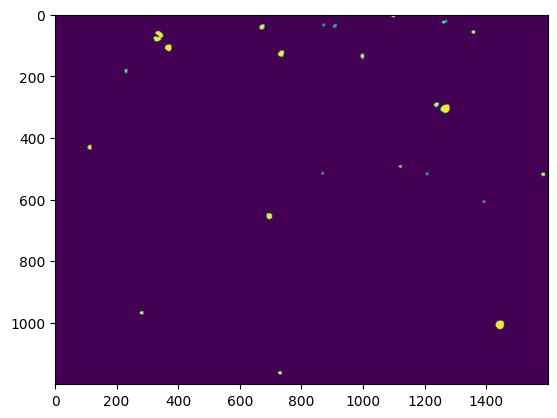

In [141]:
pathTemp = selected_files[2]
image = cv2.imread(pathTemp, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
aux1, aux2, aux3, aux4 = random_configs[2].getPrediction(pathTemp)
plt.imshow(aux2)

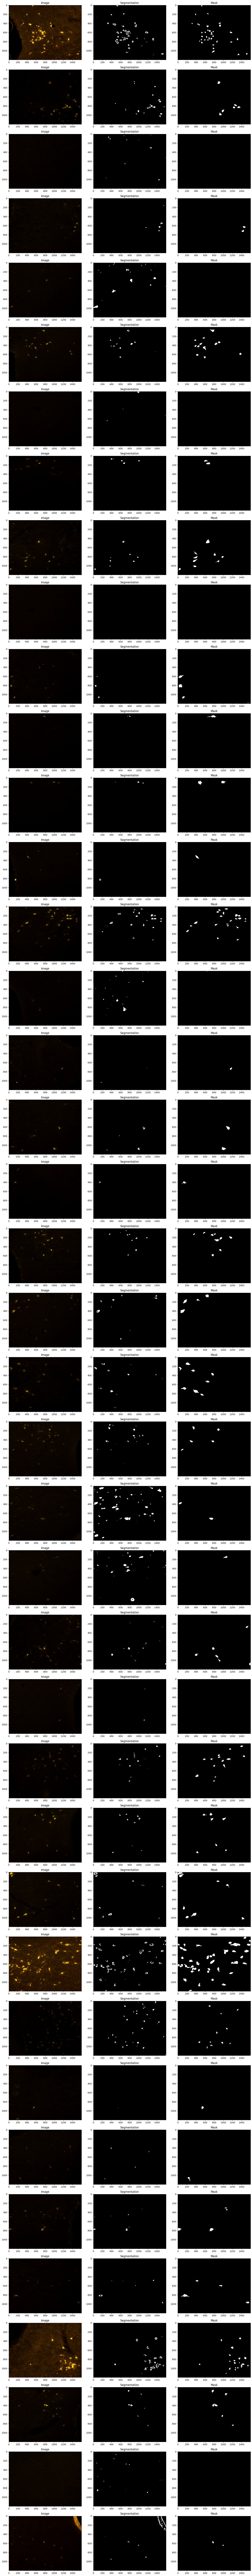

In [144]:
n = 40
fig, axarr = plt.subplots(n, 3, figsize=(16, 4*n))

for i in range(n):
    pathTemp = selected_files[i]
    image = cv2.imread(pathTemp, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    lyr1, lyr2, aux1, aux2 = random_configs[2].getPrediction(pathTemp)
    #getImageAndMask(pathTemp, random_configs[1])

    axarr[i, 0].imshow(image)
    axarr[i, 1].imshow(aux1, cmap='gray')
    axarr[i, 2].imshow(aux2, cmap='gray')

    axarr[i, 0].set_title('Image')
    axarr[i, 1].set_title('Segmentation')
    axarr[i, 2].set_title('Mask')

plt.tight_layout()
plt.show()